### Keyboard Shortcuts
When describing keyboard shortcuts, `+` means 'press at the same time', `,` means 'press after.

See more at Help > Keyboard Shortcuts.

| Command       | Function      |
| ------------- |:-------------:|
| `Esc`|Stop editing this cell|
|`Shift + Enter`|Run this cell|
|`Alt + Enter`| Run this cell and make a new cell after it|
|`Esc, a`| Create a new cell above the current one|
|`Esc, b`| Create a new cell below the current one|
|`Esc, x`| Cut cell|
|`Esc, v`| Paste cell|
|`Esc, d, d`|Delete the current cell|
|`Ctrl + /`| Toggle comments in Python code (Linux / Windows)|
|`Up Arrow`, `Down Arrow`| Navigate between cells (in command mode)|
|`Esc, m, Enter`| Convert the current cell to markdown and start editing it again|
|`Esc, y, Enter`| Convert the current cell to a code cell and start editing it again|


[Markdown Cheat Sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).


## Analyze pandas-processed node-edge contacts of Hv1-2GBI system.

By: Victoria Lim  
Last updated: 2017-09-04

### Version 1

Seeded from:
`/beegfs/DATA/mobley/limvt/hv1/04_fep/sandbox_nodeScript/nodeContacts_v2.ipynb`

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [10]:
nodes, edges = pickle.load( open( 'taut1_npt0910/test-001-005.pickle', "rb" ))

In [11]:
nodes.head()

,resname,resid,location,type,code,nAtoms
index,,,,,,
1,PHE,88,bb,POS,NT,1
2,PHE,88,sc,NOP,AB,2
3,PHE,88,sc,NOP,GDEZ,6
4,ARG,89,sc,NOP,AB,2
5,ARG,89,sc,NOP,GD,2


In [12]:
nodes.describe()

,resid,nAtoms
count,11234.000000,11234.000000
mean,5181.949795,1.067741
std,3218.124049,0.388503
min,0.000000,1.000000
25%,2358.250000,1.000000
50%,5166.500000,1.000000
75%,7974.750000,1.000000
max,10783.000000,6.000000


In [13]:
edges.describe()

,node_i,node_j,weight,count,average
count,15429.000000,15429.000000,15429.000000,15429.000000,15429.000000
mean,2424.038304,5761.860976,4.829023,2.112062,1.619683
std,2715.366571,3749.621932,8.260861,1.563148,1.451232
min,1.000000,3.000000,1.000000,1.000000,1.000000
25%,260.000000,2124.000000,1.000000,1.000000,1.000000
50%,1109.000000,6385.000000,1.000000,1.000000,1.000000
75%,4170.000000,9068.000000,4.000000,3.000000,1.600000
max,11232.000000,11234.000000,108.000000,5.000000,21.600000


In [14]:
edges.head(n=18)

,node_i,node_j,weight,attribute,count,average
0,1,3,7,STER,5.0,1.400000
2,1,7,15,HBOND,5.0,3.000000
4,1,10,2,STER,2.0,1.000000
5,1,11,5,STER,5.0,1.000000
7,1,12,1,HBOND,1.0,1.000000
8,1,4941,5,HBOND,5.0,1.000000
10,1,5400,4,HBOND,4.0,1.000000
11,1,6490,3,HBOND,3.0,1.000000
13,1,7206,3,HBOND,3.0,1.000000
15,1,7994,4,HBOND,4.0,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b6a15aba780>]], dtype=object)

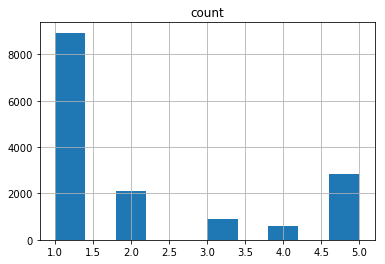

In [15]:
edges.hist(column='count')

### Check out details on interaction "strength"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b6f96be3128>]], dtype=object)

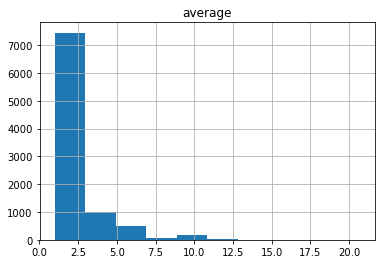

In [30]:
edges.hist(column='average')

In [31]:
print(edges['average'].describe())
edges.nlargest(5,'average')

count    9236.000000
mean        1.939530
std         1.792974
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        20.666667
Name: average, dtype: float64


,node_i,node_j,weight,attribute,count,average
7384,369,371,62,HPHOB,3.0,20.666667
4848,240,243,61,HPHOB,3.0,20.333333
625,28,46,49,HPHOB,3.0,16.333333
46,3,221,48,HPHOB,3.0,16.000000
42,3,14,47,HPHOB,3.0,15.666667


### Check out details on particular pairs

In [15]:
 # subtract 1 from edge index to get node details
print(nodes.iloc[[368,370]])
print(nodes.iloc[[239,242]])
print(nodes.iloc[[27,45]])
print(nodes.iloc[[2,220]])
print(nodes.iloc[[2,13]])

      resname  resid location type  code  nAtoms
index                                           
369       TRP    207       sc  NOP  ABGD       4
371       TRP    207       sc  NOP   EZH       6
      resname  resid location type  code  nAtoms
index                                           
240       PHE    165       sc  NOP  GDEZ       6
243       PHE    166       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
28        PHE     96       sc  NOP  GDEZ       6
46        PHE    101       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
3         PHE     88       sc  NOP  GDEZ       6
221       PHE    159       sc  NOP  GDEZ       6
      resname  resid location type  code  nAtoms
index                                           
3         PHE     88       sc  NOP  GDEZ       6
14        LEU     92       sc  NOP    GD       3


### Check out details interaction types

In [20]:
edges['attribute'].describe()

count      9236
unique        4
top       HBOND
freq       5752
Name: attribute, dtype: object

### Check out details interaction types

In [21]:
edges.groupby('attribute').count()

,node_i,node_j,weight,count
attribute,,,,
COUL,25,25,25,25
HBOND,5752,5752,5752,5752
HPHOB,894,894,894,894
STER,2565,2565,2565,2565


In [32]:
edges.loc[edges['attribute'] == 'COUL'].sort_values('average',ascending=False)

,node_i,node_j,weight,attribute,count,average
4676,230,264,28,COUL,3.0,9.333333
4185,202,419,27,COUL,3.0,9.000000
6478,323,375,27,COUL,3.0,9.000000
4666,230,237,26,COUL,3.0,8.666667
135,6,446,19,COUL,3.0,6.333333
1657,77,11234,18,COUL,3.0,6.000000
2061,96,375,18,COUL,3.0,6.000000
2361,109,364,18,COUL,3.0,6.000000
5551,274,430,18,COUL,3.0,6.000000
6040,302,383,18,COUL,3.0,6.000000


In [33]:
edges.loc[edges['attribute'] == 'COUL'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
4676,230,264,28,COUL,3.0,9.333333
4185,202,419,27,COUL,3.0,9.000000
6478,323,375,27,COUL,3.0,9.000000
4666,230,237,26,COUL,3.0,8.666667
135,6,446,19,COUL,3.0,6.333333


In [34]:
edges.loc[edges['attribute'] == 'HBOND'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
1988,93,97,27,HBOND,3.0,9.0
5952,299,303,27,HBOND,3.0,9.0
7665,387,390,27,HBOND,3.0,9.0
701,32,35,27,HBOND,3.0,9.0
4123,199,203,27,HBOND,3.0,9.0


In [35]:
edges.loc[edges['attribute'] == 'HPHOB'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
7384,369,371,62,HPHOB,3.0,20.666667
4848,240,243,61,HPHOB,3.0,20.333333
625,28,46,49,HPHOB,3.0,16.333333
46,3,221,48,HPHOB,3.0,16.000000
42,3,14,47,HPHOB,3.0,15.666667


In [36]:
edges.loc[edges['attribute'] == 'STER'].sort_values('average',ascending=False).head(5)

,node_i,node_j,weight,attribute,count,average
3420,155,165,41,STER,3.0,13.666667
1051,46,50,40,STER,3.0,13.333333
3949,189,193,39,STER,3.0,13.000000
5844,292,296,37,STER,3.0,12.333333
4572,226,231,36,STER,3.0,12.000000


In [39]:
coulres = np.unique(edges.loc[edges['attribute'] == 'COUL'][['node_i','node_j']])
coulres = list(coulres-1) # for zero-based indexing
print(coulres)

[5, 17, 76, 95, 108, 201, 214, 229, 236, 263, 273, 301, 322, 363, 374, 382, 418, 425, 429, 442, 445, 11233]


In [40]:
nodes.iloc[coulres]

,resname,resid,location,type,code,nAtoms
index,,,,,,
6,ARG,89,sc,POS,EZ,4
18,ARG,93,sc,POS,EZ,4
77,ASP,112,sc,NEG,D,2
96,GLU,119,sc,NEG,DE,3
109,ASP,123,sc,NEG,D,2
202,GLU,153,sc,NEG,DE,3
215,LYS,157,sc,POS,Z,1
230,ARG,162,sc,POS,EZ,4
237,GLU,164,sc,NEG,DE,3
